In [96]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data extraction

In [5]:
sas_token = "sv=2022-11-02&ss=bfqt&srt=co&sp=r&se=2024-09-08T21:42:10Z&st=2024-07-08T13:42:10Z&spr=https&sig=GPNpEjOEf0bdd5l3en38h6zjhBgNFNsaoalVbKj7k%2FU%3D"
base_url = "https://detask.blob.core.windows.net/de-task/"

plan_data = f"{base_url}1AHA810_plan.csv?{sas_token}"
postbuy_data = f"{base_url}1AHA810_postbuy.csv?{sas_token}"

In [7]:
def download_csv(url,file):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file, 'wb') as file:
            file.write(response.content)
        print("Download done")
    else:
        print(f"Download failed. Status code: {response.status_code}")
download_csv(plan_data, "data/plan_data.csv")
download_csv(postbuy_data, "data/postbuy_data.csv")       

Download done
Download done


### Data reading

In [68]:
plan_df = pd.read_csv("data/plan_data.csv")
postbuy_df = pd.read_csv("data/postbuy_data.csv")

In [69]:
plan_df.head()

,Date,Job Number,Start,End,Impressions_DailyGoal,Impressions_Client,Clicks_DailyGoal,Clicks_Client,Views_DailyGoal,Views_Client,Other_DailyGoal,Other_Client
0,2018-10-04,1AHA810,01/01/2018,31/12/2018,495268.4,20172.539051,364.5714,22140.639861,0,0,0,0
1,2018-09-11,1AHA810,01/01/2018,31/12/2018,490266.7,19958.414686,317.1429,19260.278600,0,0,0,0
2,2018-11-19,1AHA810,01/01/2018,31/12/2018,393864.1,14051.593576,328.1429,19928.315199,0,0,0,0
3,2018-10-27,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
4,2018-12-12,1AHA810,01/01/2018,31/12/2018,370985.6,15978.972456,136.0000,8259.361599,0,0,0,0


In [70]:
postbuy_df

,Unnamed: 0,Id,Account,BusinessUnit,Date,ReportGranularity,SalesChannel,PlatformId,PlatformCode,ChannelId,...,Conversions,Deliveries,NetRevenue,GrossProfit,CurrencyCode,AppliedAttributionModel,PeriodStartDate,EtlLoader,CreatedAt,ModifiedAt
0,0,11E323D9-A905-4D55-A2B5-573A180E5A62,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsnonbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsnonbrand,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsremarketing,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,3,4A7D538A-D916-4393-809E-746430C525C5,ahato,ahatocz,03/10/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-10-03 00:00:00.000000,DataFactory,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,4,CCCA47E2-692B-4122-870D-D917142F2DCE,ahato,ahatocz,03/10/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-10-03 00:00:00.000000,DataFactory,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,5.0,5.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,15049,E8D19533-7677-48A6-8868-C472FBB55674,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcskliknonbrand,...,0.0,0.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcskliknonbrand,...,3.0,3.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


## Data cleaning - postbuy

In [71]:
postbuy_df.shape

(15053, 38)

In [72]:
postbuy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               15053 non-null  int64  
 1   Id                       15053 non-null  object 
 2   Account                  15053 non-null  object 
 3   BusinessUnit             15053 non-null  object 
 4   Date                     15053 non-null  object 
 5   ReportGranularity        15053 non-null  object 
 6   SalesChannel             15053 non-null  object 
 7   PlatformId               15053 non-null  object 
 8   PlatformCode             15053 non-null  object 
 9   ChannelId                15053 non-null  object 
 10  ChannelCode              15053 non-null  object 
 11  TagCodes                 0 non-null      float64
 12  Site                     15053 non-null  object 
 13  AdSource                 15053 non-null  object 
 14  AdMedium              

In [73]:
def print_value_counts(df):
    for column in df.columns:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("\n")

In [74]:
for column in postbuy_df.columns:
    pct_missing = np.mean(postbuy_df[column].isnull()) *100
    print('{} - {}%'.format(column, pct_missing))

Unnamed: 0 - 0.0%
Id - 0.0%
Account - 0.0%
BusinessUnit - 0.0%
Date - 0.0%
ReportGranularity - 0.0%
SalesChannel - 0.0%
PlatformId - 0.0%
PlatformCode - 0.0%
ChannelId - 0.0%
ChannelCode - 0.0%
TagCodes - 100.0%
Site - 0.0%
AdSource - 0.0%
AdMedium - 0.0%
AdCampaign - 0.0%
JobNumber - 0.0%
LineItem - 0.0%
Source - 53.94273566730884%
Format - 0.23251179166943464%
Target - 0.23251179166943464%
Other1 - 0.23251179166943464%
Other2 - 19.28519232046768%
MarketingInvestment - 0.06643194047698132%
Views - 0.06643194047698132%
Impressions - 0.06643194047698132%
Clicks - 0.06643194047698132%
Visits - 0.0%
Conversions - 0.0%
Deliveries - 0.0%
NetRevenue - 0.0%
GrossProfit - 0.0%
CurrencyCode - 0.0%
AppliedAttributionModel - 0.0%
PeriodStartDate - 0.0%
EtlLoader - 0.0%
CreatedAt - 0.0%
ModifiedAt - 0.0%


In [75]:
print_value_counts(postbuy_df)

Value counts for column 'Unnamed: 0':
Unnamed: 0
0        1
10040    1
10028    1
10029    1
10030    1
        ..
5022     1
5023     1
5024     1
5025     1
15052    1
Name: count, Length: 15053, dtype: int64


Value counts for column 'Id':
Id
11E323D9-A905-4D55-A2B5-573A180E5A62    1
4E0C048F-0C0C-4DA3-ADF6-768748F82AE3    1
6AD6D72D-28D2-4411-8B9E-8B52B7B5D885    1
F1260621-015F-4E0D-A8BD-1AA4EF77BFBF    1
F857B935-8794-488D-99ED-40A6B41CC16D    1
                                       ..
90E06DA8-381F-4C03-87A6-5A3AD709246F    1
ACE52BA3-595B-49C8-BE1B-20EB047E682D    1
0B00B554-DD6F-4B6D-93AE-D8A0F8771E17    1
A93079DF-1327-4608-9B44-916124645EAC    1
9F78F8FC-6D53-475C-888F-F5183E915BDC    1
Name: count, Length: 15053, dtype: int64


Value counts for column 'Account':
Account
ahato    15053
Name: count, dtype: int64


Value counts for column 'BusinessUnit':
BusinessUnit
ahatocz    15053
Name: count, dtype: int64


Value counts for column 'Date':
Date
28/06/2018    92
15/01/2018 

In [76]:
postbuy_df['Views'].value_counts()

Views
0.0    15043
Name: count, dtype: int64

In [77]:
postbuy_df = postbuy_df.drop(columns=['Account','BusinessUnit','ReportGranularity','SalesChannel','TagCodes', 'PlatformId', 'EtlLoader', 'AppliedAttributionModel','ChannelId', 'JobNumber', 'CurrencyCode', 'AdMedium', 'AdSource', 'Other2', 'Source', 'Format'])

In [78]:
postbuy_df = postbuy_df.drop(postbuy_df.columns[0], axis=1)

In [79]:
postbuy_df

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


In [80]:
for column in postbuy_df.columns:
    pct_missing = np.mean(postbuy_df[column].isnull()) *100
    print('{} - {}%'.format(column, pct_missing))

Id - 0.0%
Date - 0.0%
PlatformCode - 0.0%
ChannelCode - 0.0%
Site - 0.0%
AdCampaign - 0.0%
LineItem - 0.0%
Target - 0.23251179166943464%
Other1 - 0.23251179166943464%
MarketingInvestment - 0.06643194047698132%
Views - 0.06643194047698132%
Impressions - 0.06643194047698132%
Clicks - 0.06643194047698132%
Visits - 0.0%
Conversions - 0.0%
Deliveries - 0.0%
NetRevenue - 0.0%
GrossProfit - 0.0%
PeriodStartDate - 0.0%
CreatedAt - 0.0%
ModifiedAt - 0.0%


In [81]:
df_cleaned = postbuy_df.dropna()

In [82]:
df_cleaned

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


In [84]:
postbuy_df.dropna(inplace=True)

In [85]:
postbuy_df

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


## Count % total budget gone

In [86]:
plan_df

,Date,Job Number,Start,End,Impressions_DailyGoal,Impressions_Client,Clicks_DailyGoal,Clicks_Client,Views_DailyGoal,Views_Client,Other_DailyGoal,Other_Client
0,2018-10-04,1AHA810,01/01/2018,31/12/2018,495268.4,20172.539051,364.5714,22140.639861,0,0,0,0
1,2018-09-11,1AHA810,01/01/2018,31/12/2018,490266.7,19958.414686,317.1429,19260.278600,0,0,0,0
2,2018-11-19,1AHA810,01/01/2018,31/12/2018,393864.1,14051.593576,328.1429,19928.315199,0,0,0,0
3,2018-10-27,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
4,2018-12-12,1AHA810,01/01/2018,31/12/2018,370985.6,15978.972456,136.0000,8259.361599,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2018-06-25,1AHA810,01/01/2018,31/12/2018,470422.2,18010.721791,228.7543,13892.385889,0,0,0,0
360,2018-02-02,1AHA810,01/01/2018,31/12/2018,637938.4,20416.772871,315.0000,19130.138997,0,0,0,0
361,2018-10-09,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
362,2018-07-01,1AHA810,01/01/2018,31/12/2018,470422.2,18010.721791,228.7543,13892.385889,0,0,0,0


In [94]:
budget_cols = ['Impressions_Client', 'Clicks_Client', 'Views_Client', 'Other_Client']
budget = {col: plan_df[col].sum() for col in budget_cols}
total_budget = sum(budget.values())


for col, col_sum in budget.items():
    print(f"Sum of {col}: {col_sum}")

print(f"Total sum of all columns: {total_budgeet}")


Sum of Impressions_Client: 6426515.831089875
Sum of Clicks_Client: 6446280.217037666
Sum of Views_Client: 0
Sum of Other_Client: 0
Total sum of all columns: 12872796.04812754


In [90]:
postbuy_df['Date'] = pd.to_datetime(postbuy_df['Date'], errors='coerce')
highest_date = postbuy_df['Date'].max()
lowest_date = postbuy_df['Date'].min()

print(f"Highest date: {highest_date}")
print(f"Lowest date: {lowest_date}")

Highest date: 2018-12-10 00:00:00
Lowest date: 2018-01-01 00:00:00


In [92]:
total_spend = postbuy_df['MarketingInvestment'].sum()
print(total_spend)

10311546.03


In [95]:
percentage_budget_used = (total_spend / total_budget) * 100
print(f"Percentage of Budget Used: {percentage_budget_used:.2f}%")

Percentage of Budget Used: 80.10%


#### Original budget for year 2018 was total of 12872796.05CZK. To date 2018-12-10 was: percentage of Budget Used: 80.10% as 10311546.03CZK in total

## Graph to compare planed impressions, clicks, views and realised investments by day

In [97]:
plan_df['Date'] = pd.to_datetime(plan_df['Date'])
postbuy_df['Date'] = pd.to_datetime(postbuy_df['Date'])

In [107]:
plan_df_sum_budget = plan_df.groupby('Date').agg({
    'Impressions_Client': 'sum',
    'Clicks_Client': 'sum',
    'Views_Client': 'sum'
})

In [108]:
plan_df_sum_budget['Totals'] = (plan_df_sum_budget['Impressions_Client'] +
                                plan_df_sum_budget['Clicks_Client'] +
                                plan_df_sum_budget['Views_Client'])

In [109]:
postbuy_df_sum = postbuy_df.groupby('Date').agg({
    'MarketingInvestment': 'sum'
})

In [110]:
merged_df = pd.merge(plan_df_sum_budget, postbuy_df_sum, left_index=True, right_index=True, how='outer')

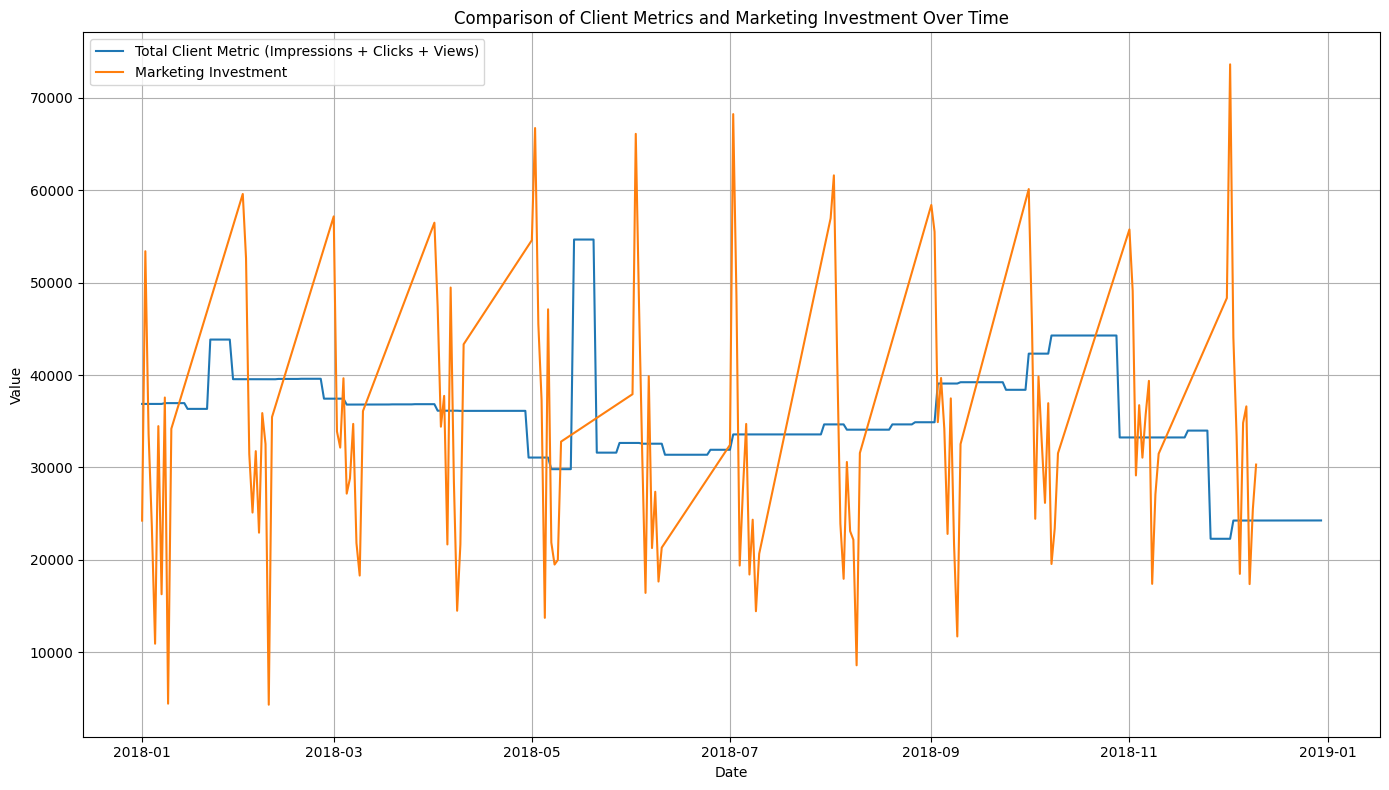

In [111]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df, x=merged_df.index, y='Total_Client_Metric', label='Total Client Metric (Impressions + Clicks + Views)')
sns.lineplot(data=merged_df, x=merged_df.index, y='MarketingInvestment', label='Marketing Investment')

plt.title('Comparison of Client Metrics and Marketing Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
